# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

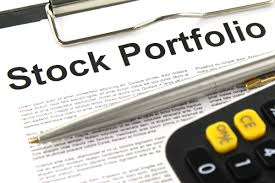

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (5 puntos).
4. Graficar los rendimientos (5 puntos).

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import pandas_datareader.data as web

data_yahoo=web.DataReader(name=['^GSPC','MSFT','WBA','TSLA'],
                          data_source='yahoo',
                          start='2011-01-01'
                          )

docs= ['^GSPC','MSFT','WBA','TSLA']
start='2011-01-01'

def get_adj_closes(tickers, start_date= '2011-01-01' , end_date='2015-12-15'):
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

Adj= get_adj_closes(tickers=docs,
                      start_date=start
                      )
Adj.head()

In [199]:
docs = ['^GSPC','MSFT','WBA','TSLA']
def read_AdjClose(docs):
    res = pd.read_csv(docs[0]+'.csv',index_col='Date')['Adj Close']
    for i in range(len(docs)-1): 
        a = pd.read_csv(docs[i+1]+'.csv',index_col='Date')
        res = pd.concat([res,a['Adj Close']],axis=1)
    res.columns = docs
    return(res)


In [200]:
Adj = read_AdjClose(docs)
Adj.head()

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-03,1271.869995,22.558224,32.173080,26.620001
2011-01-04,1270.199951,22.646908,32.443100,26.670000
2011-01-05,1276.560059,22.574345,32.893124,26.830000
2011-01-06,1273.849976,23.235449,32.991314,27.879999
2011-01-07,1271.500000,23.058081,32.794937,28.240000


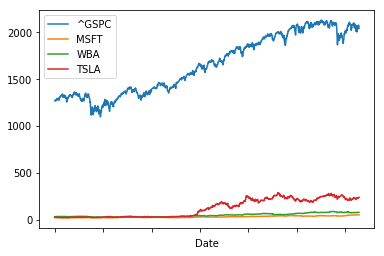

In [201]:
Adj.plot();

In [202]:
pct = Adj.pct_change().dropna()
pct.head()

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-04,-0.001313,0.003931,0.008393,0.001878
2011-01-05,0.005007,-0.003204,0.013871,0.005999
2011-01-06,-0.002123,0.029286,0.002985,0.039135
2011-01-07,-0.001845,-0.007634,-0.005952,0.012913
2011-01-10,-0.001376,-0.013287,0.021707,0.007436


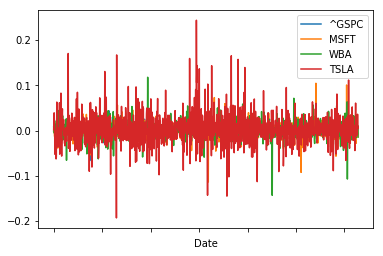

In [203]:
pct.plot();

## 2. Rendimiento esperado y volatilidad para cada activo (30 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).

In [204]:
#Rendimientos diarios
pct_mean = pct.mean()
pct_mean

^GSPC    0.000425
MSFT     0.000764
WBA      0.000839
TSLA     0.002296
dtype: float64

In [205]:
#Volatilidad diaria
pct_std = pct.std()
pct_std

^GSPC    0.009738
MSFT     0.014799
WBA      0.016246
TSLA     0.033246
dtype: float64

In [206]:
#Rendimiento esperado y volatilidad anualizados. 
pct_summary = pd.DataFrame(data={'Mean':252*pct_mean,'Volatility':np.sqrt(252)*pct_std},index=pct.columns)
pct_summary

,Mean,Volatility
^GSPC,0.107092,0.154583
MSFT,0.192463,0.234922
WBA,0.211496,0.257905
TSLA,0.578548,0.527757


In [207]:
# De esta forma se calcularía la covarianza entre cada una de las variables
# Aquí se calcula la covarianza entre TSLA y MSFT. 
cov_Tsla_Msft = ((pct.MSFT-pct_mean.MSFT)*(pct.TSLA-pct_mean.TSLA)).mean()  
cov_Tsla_Msft

0.00011986074837237107

In [208]:
# Se podría hacer lo anterior manualmente, sin embargo, Pandas ya tiene integrada una matriz de covarianzas. 
pct_cov = pct.cov()
# pct_cov = np.cov(pct.iloc[:,1::].T) También es posible calcularlos con Numpy. 
pct_cov

,^GSPC,MSFT,WBA,TSLA
^GSPC,0.000095,0.000092,0.000075,0.000124
MSFT,0.000092,0.000219,0.000072,0.000120
WBA,0.000075,0.000072,0.000264,0.000083
TSLA,0.000124,0.000120,0.000083,0.001105


In [209]:
# De la misma forma, así se calcularía la correlación entre cada una de las variables
# Aquí se calcula la Correlacion entre TSLA y MSFT. 
corr_Tsla_Msft = cov_Tsla_Msft/(pct_std.MSFT*pct_std.TSLA)
corr_Tsla_Msft

0.24362328062834354

In [210]:
# Utilizando Pandas.
pct_corr = pct.corr(method='pearson')
pct_corr

,^GSPC,MSFT,WBA,TSLA
^GSPC,1.000000,0.635637,0.471246,0.383444
MSFT,0.635637,1.000000,0.298438,0.243817
WBA,0.471246,0.298438,1.000000,0.153495
TSLA,0.383444,0.243817,0.153495,1.000000


La matriz de correlación proporcionada por Pandas y la calculada manualmente difieren en un .02% en el dato de Tsla vs. Msft, sin embargo, supongo que esto se debe a alguna diferencia entre el cálculo de las varianzas como muestrales o poblacionales. 

## 3. Rentimiento esperado y volatilidad para portafolios (30 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (15 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (10 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [211]:
#Portafolio (En ningún portafolio se considera la 'compra' del índice.)
Portfolio = pd.DataFrame([[0,0.3333,0.3333,0.3334],[0,0.3,0.2,0.5],[0,0.5,0.3,0.2],[0,0.2,0.5,0.3]],
                         columns=['^GSPC','MSFT','WBA','TSLA'],index=['P1','P2','P3','P4']) 
Portfolio

,^GSPC,MSFT,WBA,TSLA
P1,0,0.3333,0.3333,0.3334
P2,0,0.3000,0.2000,0.5000
P3,0,0.5000,0.3000,0.2000
P4,0,0.2000,0.5000,0.3000


In [212]:
#Se calculan rendimientos como si tomaramos los portafolios en forma de activo individual 
Individual = pd.DataFrame()
for j in range(len(Portfolio.iloc[:,0])):
    i = Portfolio.index[j]
    Individual['%s'%i] = (Portfolio.loc['%s'%i]*pct).sum(axis=1)
Individual.head()

,P1,P2,P3,P4
Date,,,,
2011-01-04,0.004734,0.003797,0.004859,0.005546
2011-01-05,0.005555,0.004813,0.003759,0.008095
2011-01-06,0.023804,0.028950,0.023365,0.019090
2011-01-07,-0.000223,0.002976,-0.003020,-0.000629
2011-01-10,0.005286,0.004073,0.001356,0.010427


In [213]:
Individual_mean = Individual.mean()
Individual_mean

P1    0.001300
P2    0.001545
P3    0.001093
P4    0.001261
dtype: float64

In [214]:
#Se calculan rendimientos como si tomaramos los portafolios en forma de activo individual
Individual_std = Individual.std()
Individual_std

P1    0.015412
P2    0.019177
P3    0.013348
P4    0.015094
dtype: float64

In [215]:
#Rendimientos y volatilidad reportados tomando los activos por separado. 
Individual_summary = pd.DataFrame(data={'Mean':Individual_mean*252,'Volatility':np.sqrt(252)*Individual_std},
                        index=['P1','P2','P3','P4']) 
Individual_summary

,Mean,Volatility
P1,0.327528,0.244660
P2,0.389312,0.304428
P3,0.275390,0.211901
P4,0.317805,0.239615


In [216]:
#Rendimiento
Portfolio_rend = pct_mean.dot(Portfolio.T)
Portfolio_rend

P1    0.001300
P2    0.001545
P3    0.001093
P4    0.001261
dtype: float64

In [217]:
#Volatilidad
Portfolio_vol = np.zeros((len(Portfolio.iloc[:,0]),))
for i in range(len(Portfolio.iloc[:,0]),):
    Portfolio_vol[i] = (Portfolio.iloc[i,:].dot(Portfolio.iloc[i,:].dot(pct_cov)))**(1/2)
Portfolio_vol = pd.Series(Portfolio_vol,index=['P1','P2','P3','P4'])
Portfolio_vol

P1    0.015412
P2    0.019177
P3    0.013348
P4    0.015094
dtype: float64

In [218]:
# Rendimiento esperado y Volatilidad no anualizados
Portfolio_summary = pd.DataFrame(data={'Mean':Portfolio_rend,'Volatility':Portfolio_vol},index=Portfolio.index)
Portfolio_summary

,Mean,Volatility
P1,0.001300,0.015412
P2,0.001545,0.019177
P3,0.001093,0.013348
P4,0.001261,0.015094


In [220]:
# Rendimiento esperado y Volatilidad anualizados
Portfolio_summary = pd.DataFrame(data={'Mean':252*Portfolio_rend,'Volatility':np.sqrt(252)*Portfolio_vol},index=Portfolio.index)
Portfolio_summary

,Mean,Volatility
P1,0.327528,0.244660
P2,0.389312,0.304428
P3,0.275390,0.211901
P4,0.317805,0.239615


Se puede notar que la diferencia del rendimiento esperado y la volatilidad es nula entre un portafolio en el cual se toman los activos por separado y uno en el que se toman los activos como portafolio y se utiliza la formula. Computacionalmente hablando no se cual de los dos es más exigente, pero supongo que tomando los activos como individuales es más exigente, ya que se tiene que hacer el cálculo de cada uno de los rendimientos en cada momento.

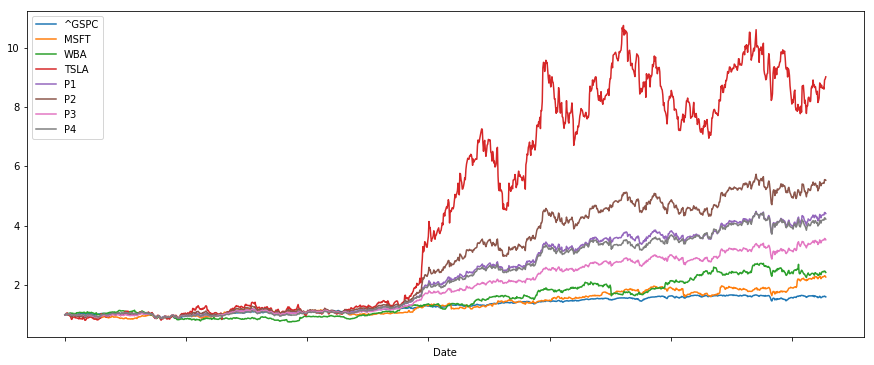

In [234]:
# Un regalito...
Simulacion = (pct.join(Individual)+1).cumprod()
Simulacion.plot(figsize=(15,6))

In [197]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 4. Gráfico de rendimientos esperados vs. volatilidad (20 puntos)

Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente.

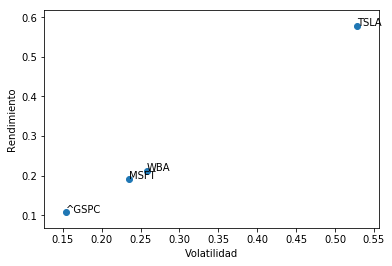

In [235]:
# Activos 
X,Y = pct_summary['Volatility'],pct_summary['Mean']

plt.scatter(X,Y)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
for i in range(len(docs)):
    plt.text(X[i],Y[i],docs[i])

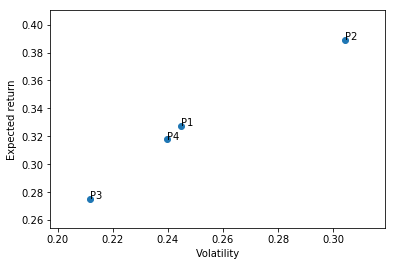

In [236]:
# Portafolio de los 3 activos

X = Portfolio_summary['Volatility']
Y = Portfolio_summary['Mean']

plt.scatter(X,Y)
plt.xlabel('Volatility')
plt.ylabel('Expected return')
for i in range(len(Portfolio.iloc[:,1])):
    plt.text(X[i],Y[i],Portfolio.index[i])

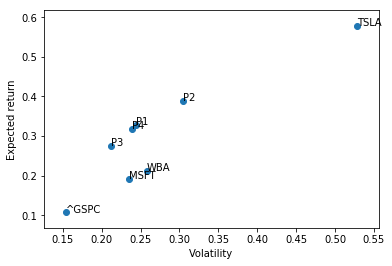

In [237]:
# Graficar los portafolios y los Activos en un la misma imagen.
X = pd.concat([Portfolio_summary['Volatility'],pct_summary['Volatility']])
Y = pd.concat([Portfolio_summary['Mean'],pct_summary['Mean']])

plt.scatter(X,Y)
plt.xlabel('Volatility')
plt.ylabel('Expected return')
for i in range(len(X)):
    plt.text(X[i],Y[i],X.index[i])

Se puede apreciar que los activos por separado pueden tener un comportamiento muy riesgoso, aunque en algunas ocasiones generan buenos rendimientos. Si se adquiere una gran cantidad de activos de una sola acción es probable que se obtengan buenas ganancias, no obstante, un portafolio podría generar 'buenos' rendimientos a costa de un riesgo mucho menor al ofrecido por cualquiera de los activos individualmente. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>